In [21]:
import pandas as pd
import numpy as np
import cv2
import json
import os
import matplotlib.pyplot as plt
import os



output = './face_resized/'

image_directory = "./face/"

In [22]:
def getJSON(filePathandName):
    with open(filePathandName,'r') as f:
        return json.load(f)

In [23]:
cvNet = cv2.dnn.readNetFromCaffe('../caffe-face-detector-opencv-pretrained-model/architecture.txt','../caffe-face-detector-opencv-pretrained-model/weights.caffemodel')

In [24]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)])
    return cv2.LUT(image.astype(np.uint8), table.astype(np.uint8))

In [25]:
import sys
sys.path.append("/home/saraiva/Desktop/University/SI/AP/TP/yoloface")

from face_detector import YoloDetector


In [26]:
%matplotlib inline


def predYOLOGraphic(test_images):

    gamma = 2.0
    fig2 = plt.figure(figsize = (14,14))
    rows = 3
    cols = 2
    axes = []
    assign = {0:"mask", 1:"no_mask" , 2:"incorrect"}

    yolo = YoloDetector(target_size=720, device="cuda:0", min_face=90)
    for j,im in enumerate(test_images):
        image =  cv2.imread(os.path.join(image_directory,im),1)
        image =  adjust_gamma(image, gamma=gamma)
        image = cv2.resize(image, (992,720))
        bboxes,_ = yolo.predict(image)
        for i in range(0, len(bboxes[0])):
            try:
                startX, startY, endX, endY = bboxes[0][i][0], bboxes[0][i][1],bboxes[0][i][2],bboxes[0][i][3]
                cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
                cv2.putText(image,assign[1] , (startX, startY-10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (36,255,12), 2)
            
            except Exception as e:
                print(e)
            
        axes.append(fig2.add_subplot(rows, cols, j+1))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    

cuda:0
/home/saraiva/Desktop/University/SI/AP/TP/yoloface/weights/yolov5n_state_dict.pt


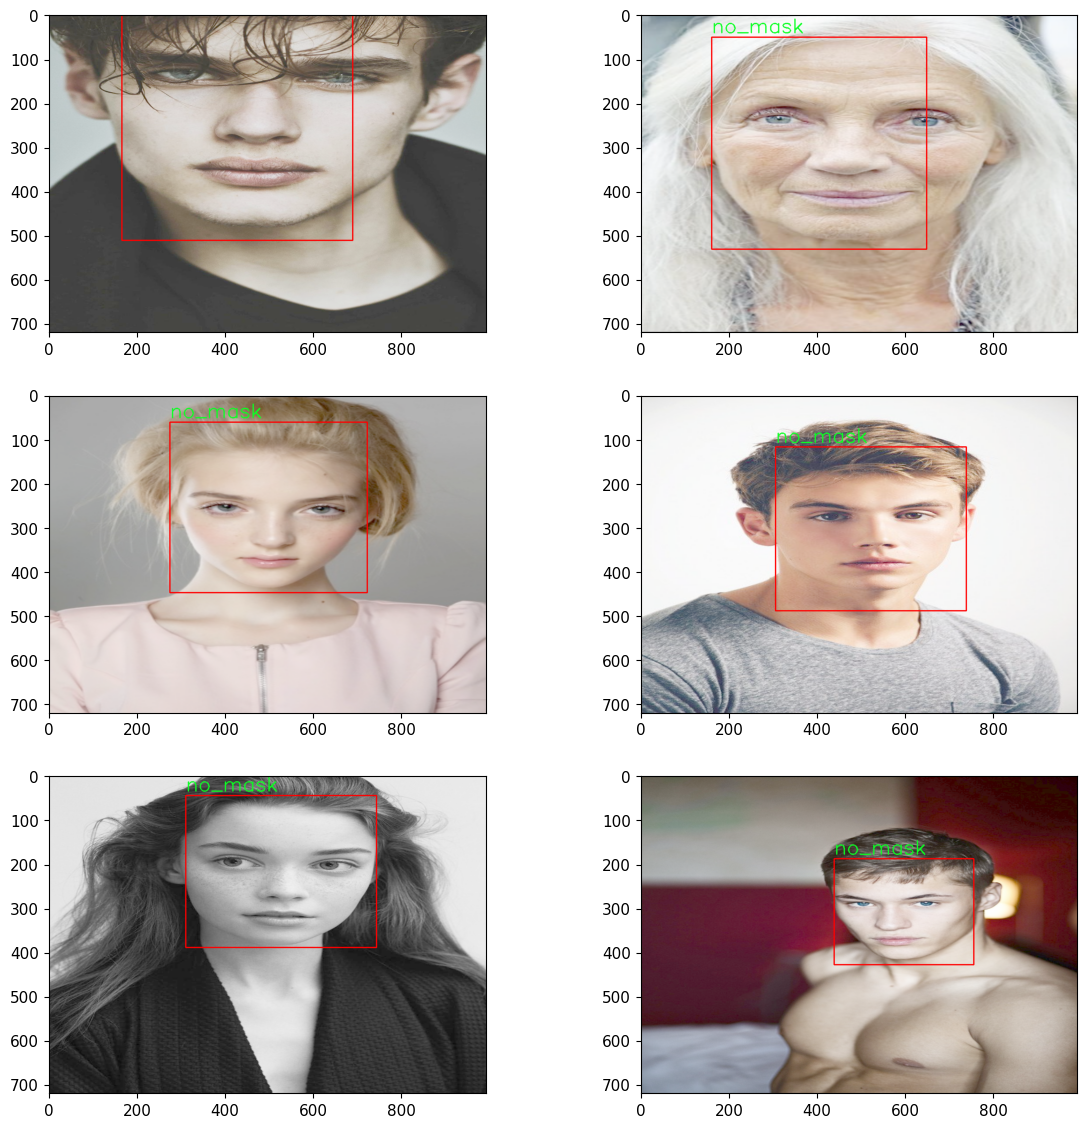

In [27]:
files = os.listdir(image_directory)

predYOLOGraphic(files[100:106])

In [28]:
def predYOLO(img):

    gamma = 2.0
    yolo = YoloDetector(target_size=720, device="cuda:0", min_face=90)
    
    image =  cv2.imread(os.path.join(image_directory,img),1)
    image =  adjust_gamma(image, gamma=gamma)
    image = cv2.resize(image, (992,720))
    cv2.imwrite(output + img, image)
    bboxes,_ = yolo.predict(image)
    
    
        
    if len(bboxes[0]) == 1:
        
        try:
            
            startX, startY, endX, endY = bboxes[0][0][0], bboxes[0][0][1],bboxes[0][0][2],bboxes[0][0][3]
            return startX, startY, endX, endY
        
        except Exception as e:
            return -1,-1,-1,-1
    
    
    else :
        return -1,-1,-1,-1       
            



In [31]:
files = os.listdir(image_directory)

df = pd.DataFrame(columns = ['name','x1', 'x2','y1','y2','classname'])

for f in files[0:2500]:
    startX, startY, endX, endY = predYOLO(f)
    if startX != -1:
        df = df.append({'name' : f, 'x1' : startX, 'x2' : endX, 'y1':startX, 'y2':endX, 'classname':'face_no_mask'},ignore_index = True)

    df.to_csv('train_face.csv')



cuda:0
/home/saraiva/Desktop/University/SI/AP/TP/yoloface/weights/yolov5n_state_dict.pt
cuda:0
/home/saraiva/Desktop/University/SI/AP/TP/yoloface/weights/yolov5n_state_dict.pt
cuda:0
/home/saraiva/Desktop/University/SI/AP/TP/yoloface/weights/yolov5n_state_dict.pt
cuda:0
/home/saraiva/Desktop/University/SI/AP/TP/yoloface/weights/yolov5n_state_dict.pt
cuda:0
/home/saraiva/Desktop/University/SI/AP/TP/yoloface/weights/yolov5n_state_dict.pt
cuda:0
/home/saraiva/Desktop/University/SI/AP/TP/yoloface/weights/yolov5n_state_dict.pt
cuda:0
/home/saraiva/Desktop/University/SI/AP/TP/yoloface/weights/yolov5n_state_dict.pt
cuda:0
/home/saraiva/Desktop/University/SI/AP/TP/yoloface/weights/yolov5n_state_dict.pt
cuda:0
/home/saraiva/Desktop/University/SI/AP/TP/yoloface/weights/yolov5n_state_dict.pt
cuda:0
/home/saraiva/Desktop/University/SI/AP/TP/yoloface/weights/yolov5n_state_dict.pt
cuda:0
/home/saraiva/Desktop/University/SI/AP/TP/yoloface/weights/yolov5n_state_dict.pt
cuda:0
/home/saraiva/Desktop/Uni